# Breast Cancer Prediction Using Random Forests

This code builds a Random Forest Classifier using the Scikit-Learn library.<br>

This is a supervised Machine learning algorithm. It creates a set of decision trees from a randomly selected subset of the training set, based on which it will reach a final prediction.<br>

We use the  <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">Breast Cancer Wisconsin Diagnostic Data Set</a> to train and test the model that classifies whether a tumor with certain characteristics is a malignant or a benign tumor.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Upload the dataset

df = pd.read_csv('breastCancer.csv')

In [3]:
# Explore the data

df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

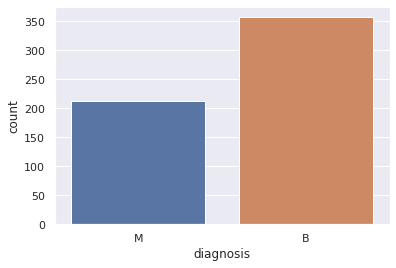

In [9]:
#Plot data of malign and benign tumors

sns.set_theme(style="darkgrid")
sns.countplot(x='diagnosis',data=df);

In [10]:
# Convert diagnosis tags to numeric values

df.diagnosis = LabelEncoder().fit_transform(df.diagnosis)
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [11]:
# Choose specific traits of the data to train and test the model

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [12]:
# Visualize this data

X = df[cols]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [13]:
y = df.diagnosis
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [14]:
# Testing set is 33% of the data, training set is 67%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [15]:
# Train model

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
predictions = model.predict(X=X_test)
precision = accuracy_score(predictions, y_test)

print(predictions)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1
 0 0 0]


In [17]:
# Check accuracy of the model

print(f'Accuracy:{precision:.2%}  ')

Accuracy:93.09%  


In [18]:
# Define function that will convert numeric value into predection of the type of tumor

def prediction(value):
    if(value == 0):
        result = 'Bening tumor'
    elif(value == 1):
        result = 'Malignant tumor'
        
    return result

In [19]:
# Try model with data known to be associated to a malignant tumor

# Malign
radius = 16.110
texture = 18.05
perimeter = 105.1
area = 813
smoothness = 0.09721
compactness = 0.1137
concavity = 0.09447
concave_points = 0.05943
symmetry = 0.1861
fractal_dimension = 0.06248

In [20]:
traits = pd.DataFrame([[radius,texture,perimeter,area,smoothness,compactness,
                        concavity,concave_points,symmetry,fractal_dimension]],columns=cols)

In [21]:
print('Prediction: ')
value = model.predict(X=traits)

print(prediction(value))

Prediction: 
Malignant tumor


In [22]:
# Try model with data known to be associated to a benign tumor

#Benign
radius = 1.66
texture = 7.07
perimeter = 73.7
area = 42
smoothness = 0.07561
compactness = 0.0363
concavity = 0.008306
concave_points = 0.01162
symmetry = 0.1671
fractal_dimension = 0.05731

In [23]:
traits = pd.DataFrame([[radius,texture,perimeter,area,smoothness,compactness,
                        concavity,concave_points,symmetry,fractal_dimension]],columns=cols)

In [24]:
print('Prediction: ')
value = model.predict(X=traits)

print(prediction(value))

Prediction: 
Bening tumor
